Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [58]:
# https://github.com/Wiaam511/EX3.git
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

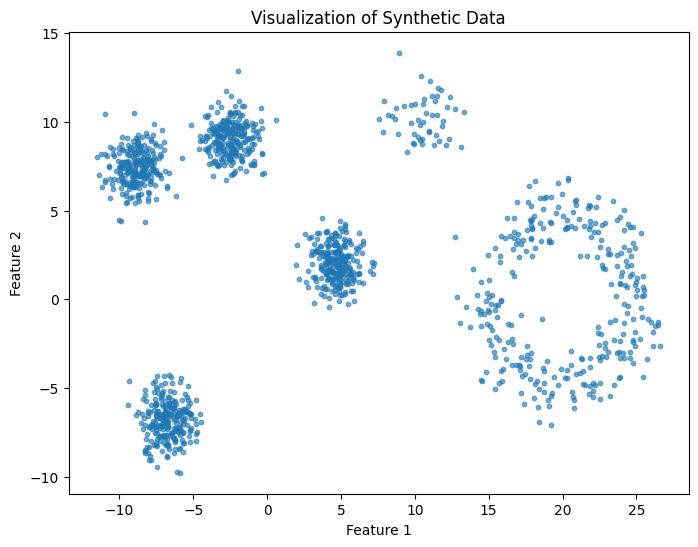

In [42]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
# Data visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.6)
plt.title("Visualization of Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

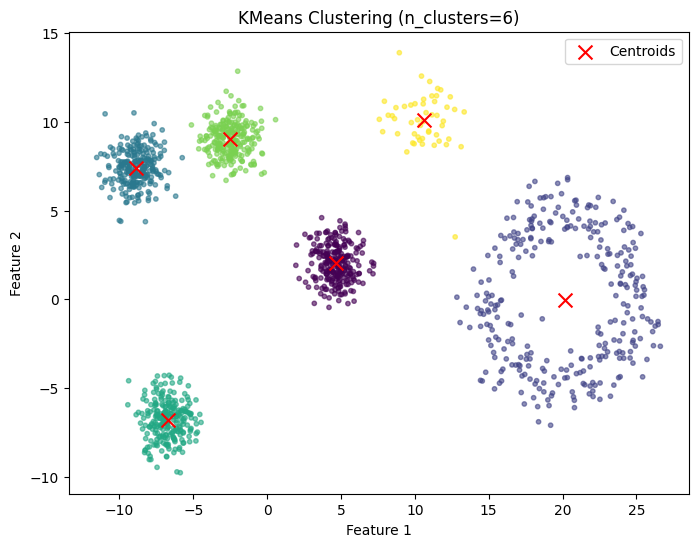

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define different cluster numbers for five experiments
kmeans_experiments = [6]

# Store experiment results
kmeans_results = []

# Train KMeans for each specified number of clusters
for k in kmeans_experiments:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Store results
    kmeans_results.append(["KMeans", {"n_clusters": k}, silhouette_avg])

    # Visualization for each experiment
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap="viridis", s=10, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='x', s=100, label='Centroids')
    plt.title(f"KMeans Clustering (n_clusters={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Convert results to DataFrame
kmeans_df = pd.DataFrame(kmeans_results, columns=["Algorithm", "Parameters", "Silhouette Score"])


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

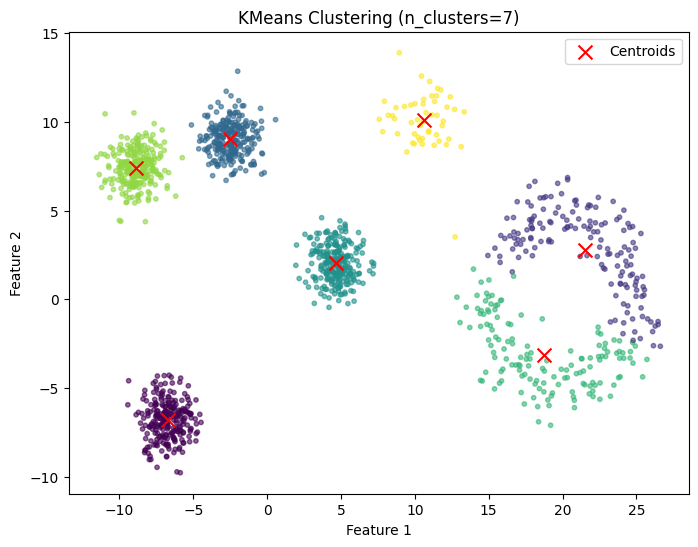

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define different cluster numbers for five experiments
kmeans_experiments = [7]

# Store experiment results
kmeans_results = []

# Train KMeans for each specified number of clusters
for k in kmeans_experiments:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Store results
    kmeans_results.append(["KMeans", {"n_clusters": k}, silhouette_avg])

    # Visualization for each experiment
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap="viridis", s=10, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='x', s=100, label='Centroids')
    plt.title(f"KMeans Clustering (n_clusters={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Convert results to DataFrame
kmeans_df = pd.DataFrame(kmeans_results, columns=["Algorithm", "Parameters", "Silhouette Score"])




5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


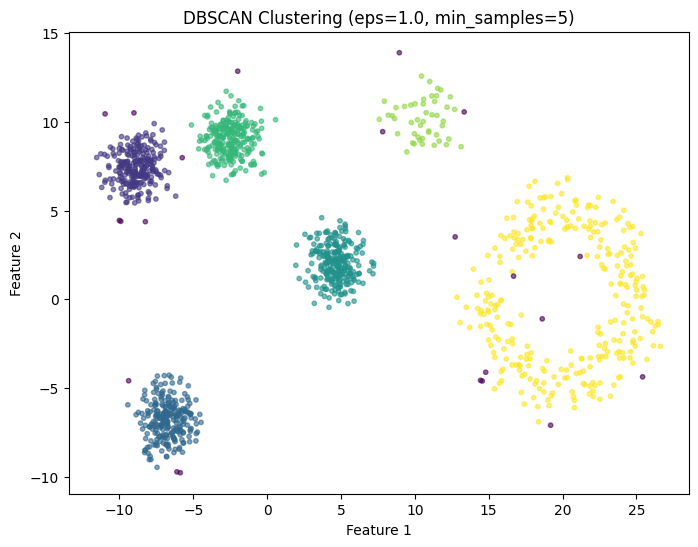

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

# Define different eps and min_samples for five experiments
dbscan_experiments = {
    'eps': [1.0],
    'min_samples': [5]  # Testing different values
}

dbscan_results = []

# Train DBSCAN for each parameter combination
for eps, min_samples in product(dbscan_experiments['eps'], dbscan_experiments['min_samples']):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Exclude noise points (-1 labels) for silhouette score calculation
    valid_labels = labels[labels != -1]
    valid_X = X[labels != -1]
    if len(np.unique(valid_labels)) > 1:
        score = silhouette_score(valid_X, valid_labels)
    else:
        score = -1  # Invalid if DBSCAN detects only noise

    dbscan_results.append(["DBSCAN", {"eps": eps, "min_samples": min_samples}, score])

    # Visualization for each experiment
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=10, alpha=0.6)
    plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Convert results to DataFrame
dbscan_df = pd.DataFrame(dbscan_results, columns=["Algorithm", "Parameters", "Silhouette Score"])




6. Compare the results and choose the best method for the data


In [55]:
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Compute silhouette scores for each clustering method (excluding noise points in DBSCAN)
kmeans_silhouette = silhouette_score(X, final_clusters)
agglo_silhouette = silhouette_score(X, agglo_clusters)

# Exclude noise points (-1 labels) in DBSCAN for silhouette score computation
dbscan_labels = dbscan_clusters[dbscan_clusters != -1]
dbscan_X = X[dbscan_clusters != -1]
if len(np.unique(dbscan_labels)) > 1:  # Ensure there are at least two clusters
    dbscan_silhouette = silhouette_score(dbscan_X, dbscan_labels)
else:
    dbscan_silhouette = -1  # Invalid score if DBSCAN found only noise

# Store and display comparison results
comparison_df = pd.DataFrame({
    "Clustering Method": ["KMeans", "Agglomerative", "DBSCAN"],
    "Silhouette Score": [kmeans_silhouette, agglo_silhouette, dbscan_silhouette]
})

print(comparison_df)


  Clustering Method  Silhouette Score
0            KMeans          0.725118
1     Agglomerative          0.697786
2            DBSCAN          0.692923
